### **Exercise1:**

Create a function returning the first N terms of the tailor series of the function without using the sympy `series` function.

### **Exercise2:**

Create a decorator that checks if the passed array is empty and only calls the function if it's not

In [16]:
import functools
import numpy as np

def check_array(func):
    @functools.wraps(func)
    def wrapper(*args, **kwargs):
        for a in args:
                #print(type(a))
                if len(a) != 0:
                    return func(*args, **kwargs)

    return wrapper

@check_array
def my_f(x):
    return 7*x

l = list()
#l.append(2)
#l.append(3)
n = np.linspace(0,10,11)
print(n)
print(my_f(n))
print(l)
print(my_f(l))

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]
[ 0.  7. 14. 21. 28. 35. 42. 49. 56. 63. 70.]
[]
None


In [9]:
import functools
debug_flag = True

def debug(func):
    @functools.wraps(func)
    def wrapper(*args, **kwargs):
        if debug_flag:
            arguments = [f"{a}" for a in args]
            karguments = [f"{k}={v}" for k,v in kwargs.items()]
            name = func.__name__
            for a in args:
                print(type(a))
            print("Calling "+name+" with args: "+", ".join(arguments)+" and kwargs: "+", ".join(karguments))
            value = func(*args, **kwargs)
            print("Run function: "+name+", which output: "+repr(value))
            return value
        else:
            return func(*args, **kwargs)
    return wrapper

@debug
def my_f(x):
    return 7*x

@debug
def my_f2(x, y):
    return x + y

print(my_f2(2, 3))
print(my_f(2))

<class 'int'>
<class 'int'>
Calling my_f2 with args: 2, 3 and kwargs: 
Run function: my_f2, which output: 5
5
<class 'int'>
Calling my_f with args: 2 and kwargs: 
Run function: my_f, which output: 14
14


### **Exercise3:**

Create a decorator to time a function execution time. Hint: use `import time` and `time_point=time.time()`. You can check if it's correct by timing the `time.sleep` function.

In [34]:
import functools
import numpy as np
import time

def timing(func):
    @functools.wraps(func)
    def wrapper(*args, **kwargs):
        start = time.time()       
        value = func(*args, **kwargs)
        stop = time.time()
        print("Time :", stop-start)
        return value    
    return wrapper

@timing
def my_f(x):
    return x*10

l = list()
l.append(2)
l.append(3)
#n = np.linspace(0,10,11)
n = np.linspace(0,100,100001)
print(n)
print(my_f(n))
print(l)
print(my_f(l))

[0.0000e+00 1.0000e-03 2.0000e-03 ... 9.9998e+01 9.9999e+01 1.0000e+02]
Time : 0.0006160736083984375
[0.0000e+00 1.0000e-02 2.0000e-02 ... 9.9998e+02 9.9999e+02 1.0000e+03]
[2, 3]
Time : 2.1457672119140625e-06
[2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3]


### **Exercise4:**

Create a decorator to plot a function over some fixed interval.

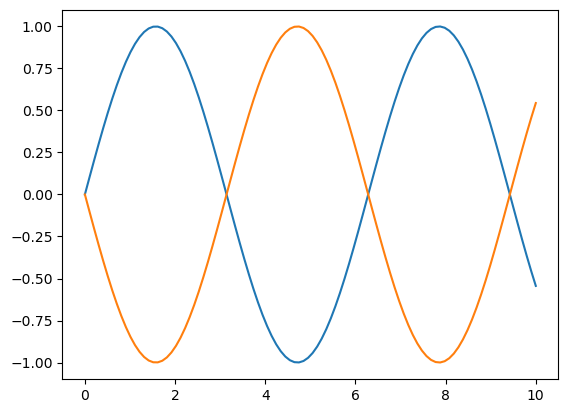

In [44]:
import functools
import numpy as np

def plotting(func):
    @functools.wraps(func)
    def wrapper(*args, **kwargs):          
        value = func(*args, **kwargs)
        plt.plot(*args,value)
            
        return value    
    return wrapper

@plotting
def my_sin(x):
    return np.sin(x)

@plotting
def my_sin2(x):
    return -np.sin(x)


n = np.linspace(0,10,100)
#print(n)
#print(my_sin(n))
a = my_sin(n)
b = my_sin2(n)

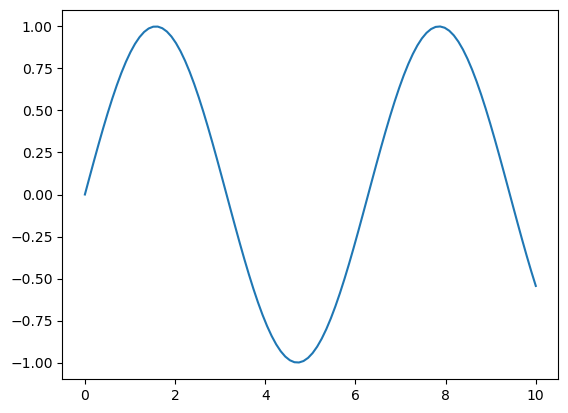

In [35]:
from matplotlib import pyplot as plt
x = np.linspace(0,10,100)
y = np.sin(x)
plt.plot(x,y)